In [12]:
using Pkg
Pkg.activate("../..")
# Pkg.instantiate()

  Activating project at `c:\Simulations\EpistemicMessagePassing`


In [13]:
using LinearAlgebra
using Plots

da = 0.01
as = da:da:(1-da)
n = length(as)

function pdf_ep(s, d)
    f_ep = zeros(n)
    for j = 1:n
        a_j = [as[j], 1-as[j]]
        f_ep[j] = exp.(s*a_j'*log.(a_j.+eps()) + s*a_j'*d)
    end
    
    return f_ep ./ sum(f_ep)
end

function pdf_dir(b)
    f_dir = zeros(n)
    for j = 1:n
        a_j = [as[j], 1-as[j]]
        f_dir[j] = exp.((b .- 1.0)'*log.(a_j.+eps()))
    end
    
    return f_dir ./ sum(f_dir)
end

function softmax(v::Vector)
    r = v .- maximum(v)
    clamp!(r, -100.0, 0.0)
    exp.(r)./sum(exp.(r))
end;

[-3.658429314905327e305, -8.951881381162527e307]
-39.0


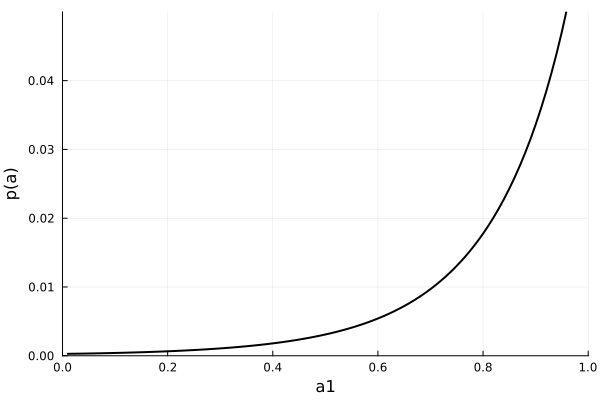

In [33]:
# Parameters
s = 0.5
d = [10.0, -1.0]
K = length(d)

x_star = softmax(-s*d)
b_k = zeros(K)
b_k_min = [1.5, 1.5] #softmax(-s*d)
for k=1:10
    b_k = 1.0 .- (x_star./s)*(sum(b_k_min) - K).^2
    b_k_min = deepcopy(b_k)
end
println(b_k)

D = (2/s - 1)^2 + (4/s)*K*(1 - K/s)
println(D)

# Univariate Distribution
plt = plot(as,
           pdf_ep(s, d),
           dpi=100,
           xlim=(0,1), 
           ylim=(0,0.05),
           xlabel="a1",
           ylabel="p(a)",
           color="black",
           label="",
           lw=2)
plot!(as, pdf_dir(b_k), lw=2, label="", color="red")
# plot!(as, pdf_dir(softmax(s*d)), lw=2, label="", color="red")